In [177]:
import pandas as pd
import numpy as np
import os
import FinanceDataReader as fdr
import matplotlib as plt
import warnings
warnings.filterwarnings('ignore')

매입날짜0102
매수날짜0329
종목코드044340
주식수 :  6 
매입단가 :  14600 원
매입가 :  87600 원
매도단가 :  29300 원
매도가 :  175800 원
수익금액 :  88200 원
수익률 :  100.68 %


<AxesSubplot:>

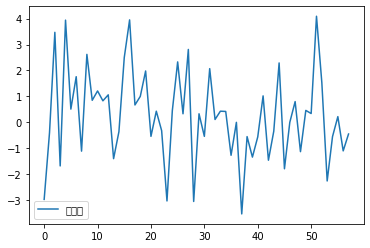

In [184]:
def stock(money, stock_code, buy_date, sell_date):
    
    df_stock = fdr.DataReader(stock_code,'2019','2020')
    df_stock.reset_index(inplace=True)
    df_stock['Date'] = df_stock['Date'].astype(str)
    df_stock['Date'] = df_stock['Date'].apply(lambda x:str(x).replace('-','')[4:8])
    df_stock.set_index('Date', inplace=True)


    buy_closing_price = df_stock.loc[buy_date,'Close']
    buy_num = int(money/buy_closing_price)
    buy_price = buy_closing_price * buy_num

    sell_closing_price = df_stock.loc[sell_date,'Close']
    sell_price = sell_closing_price * buy_num
    margin = sell_price - buy_price

    benefit = (sell_closing_price/buy_closing_price) * 100 - 100
    
    days = []
    benefit_li = []
    
    for i in df_stock.loc[buy_date:sell_date].index:
        days.append(i)

    for i,d in enumerate(days[1:]):
        a = df_stock.loc[days[i], 'Close']
        b = df_stock.loc[d,'Close']

        benefit_day = (b/a) * 100 - 100
        benefit_li.append(round(benefit_day,2))

    benefit_li
    
    
    return print('주식수 : ', buy_num, '\n' '매입단가 : ', buy_closing_price, '원''\n' '매입가 : ', buy_price, '원''\n' 
                 '매도단가 : ', sell_closing_price, '원''\n' '매도가 : ', sell_price, '원''\n' 
                 '수익금액 : ', margin, '원''\n' '수익률 : ', '{:.2f} %'.format(benefit))


buy_date = input('매입날짜')
sell_date = input('매수날짜')

money = 100000
stock_code = input('종목코드')

stock(money, stock_code, buy_date, sell_date)

benefit_daily = pd.DataFrame()
benefit_daily['수익률'] = benefit_li
benefit_daily.plot()